In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel('heart_disease_copy.xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
# Looks like there are some Null values present in the dataset. We should treat them.

In [5]:
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
# We have treated the Null values in the dataset. Lets check for duplicated values

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.reset_index(inplace=True)
df.drop(columns = 'index',inplace = True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,normal,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,fixed defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,fixed defect,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,reversable defect,4


In [13]:
# We are now done with treating missing values and duplicates. Lets understand the dataset by using data visualisation"

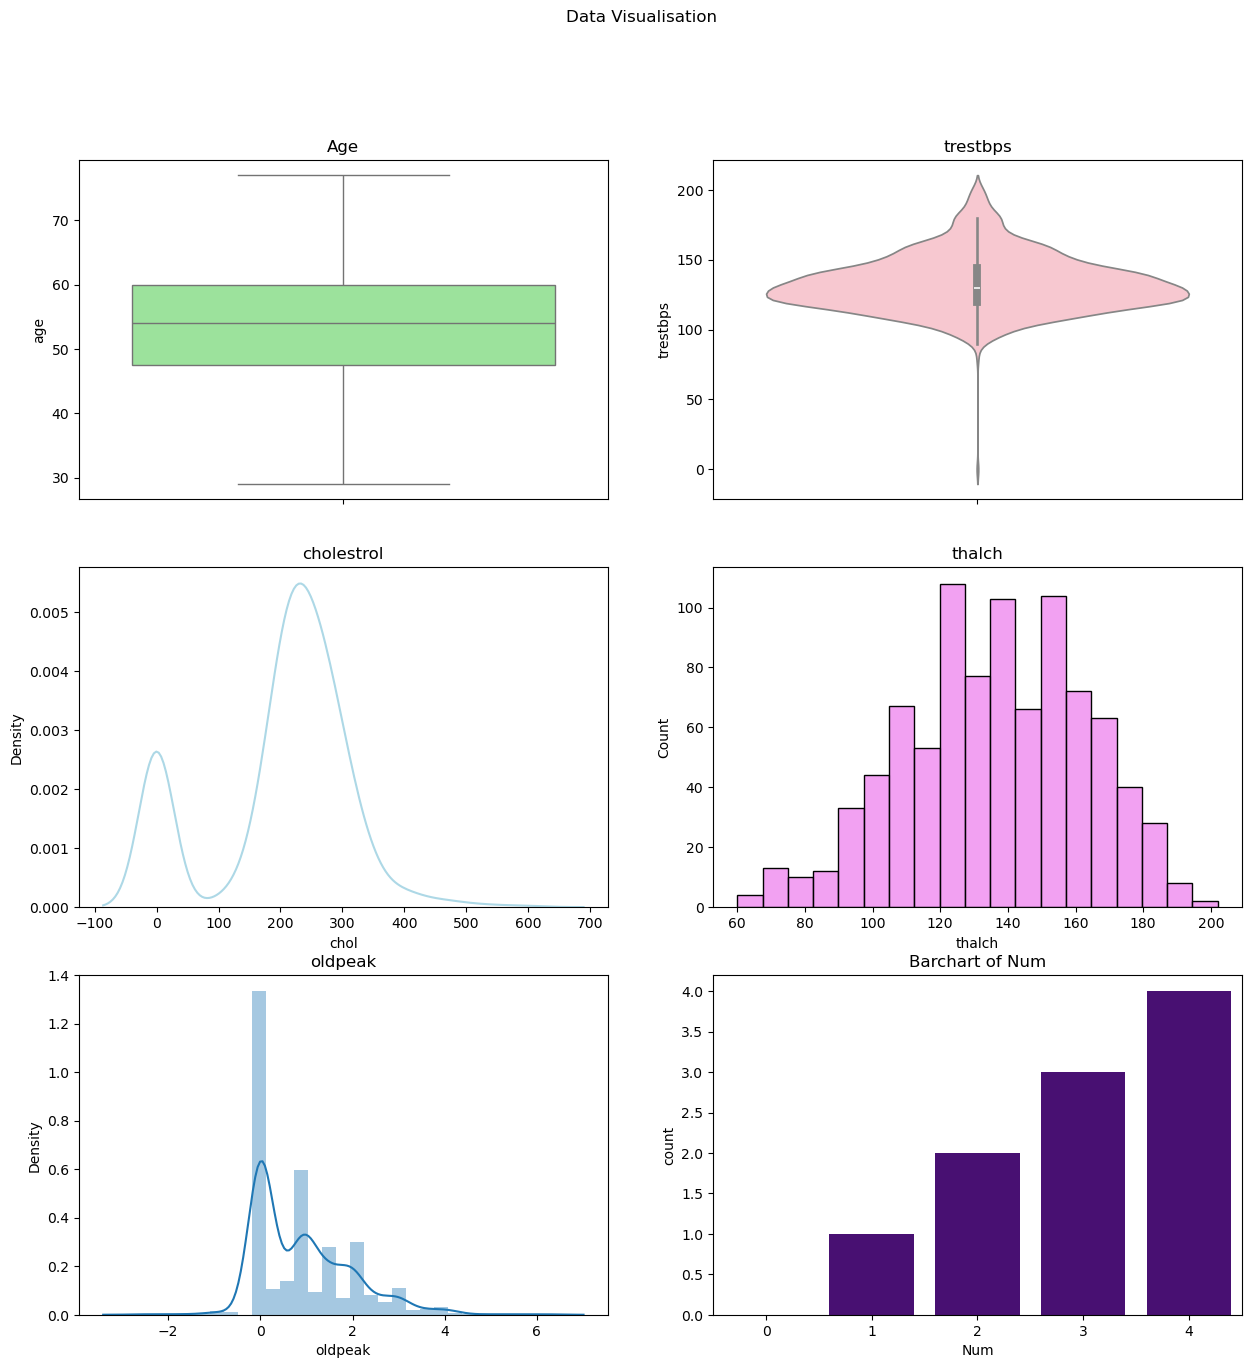

In [14]:
figure , axes = plt.subplots(3,2,figsize=(15,15))

sns.boxplot(df['age'],color='lightgreen',ax = axes[0,0])
axes[0,0].set_title('Age')

sns.violinplot(df['trestbps'],color='pink',ax = axes[0,1])
axes[0,1].set_title('trestbps')

sns.kdeplot(df['chol'],color = 'lightblue',ax = axes[1,0])
axes[1,0].set_title('cholestrol')

sns.histplot(df['thalch'],color='violet',ax = axes[1,1])
axes[1,1].set_title('thalch')

sns.distplot(df['oldpeak'],ax=axes[2,0])
axes[2,0].set_title('oldpeak')

sns.barplot(df['num'].unique(),ax=axes[2,1],color='indigo')
axes[2,1].set_title('Barchart of Num')
axes[2,1].set_xlabel('Num')
axes[2,1].set_ylabel('count')

plt.suptitle('Data Visualisation')
plt.show()

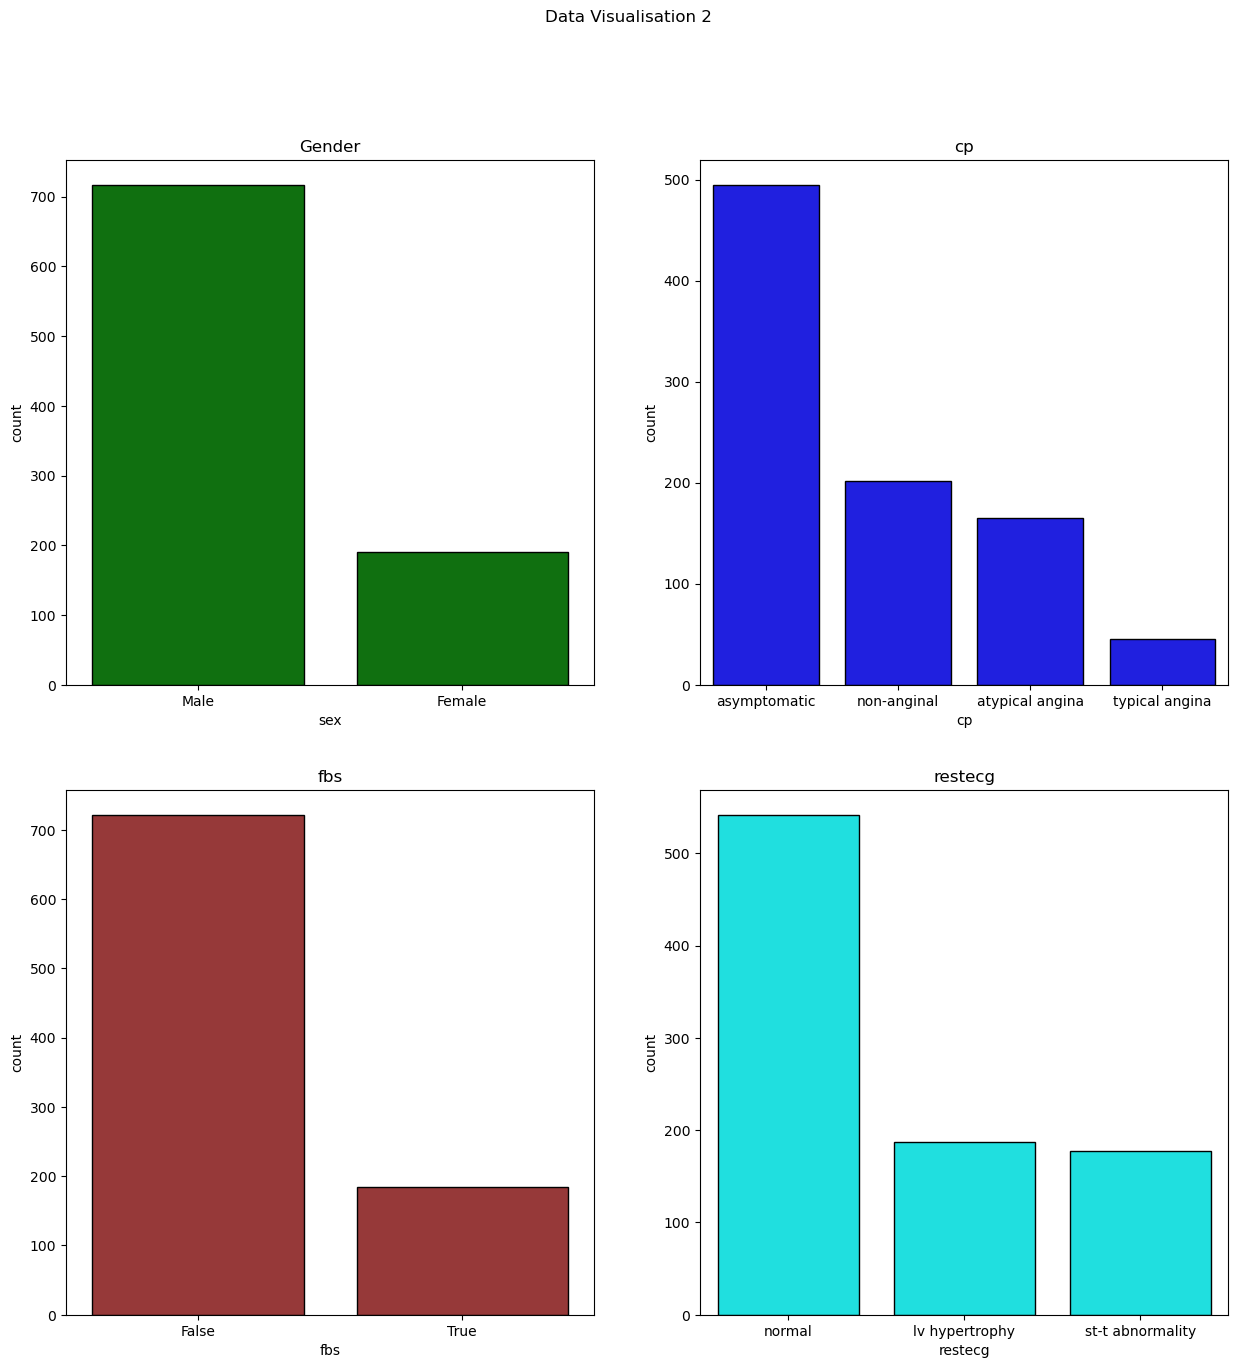

In [15]:
figure , axes = plt.subplots(2,2,figsize=(15,15))

sns.barplot(df['sex'].value_counts(),color='green',ax = axes[0,0],edgecolor='black')
axes[0,0].set_title('Gender')

sns.barplot(df['cp'].value_counts(),color='blue',ax = axes[0,1],edgecolor='black')
axes[0,1].set_title('cp')

sns.barplot(df['fbs'].value_counts(),color = 'brown',ax = axes[1,0],edgecolor='black')
axes[1,0].set_title('fbs')

sns.barplot(df['restecg'].value_counts(),color='cyan',ax = axes[1,1],edgecolor='black')
axes[1,1].set_title('restecg')

plt.suptitle('Data Visualisation 2')
plt.show()

<Axes: >

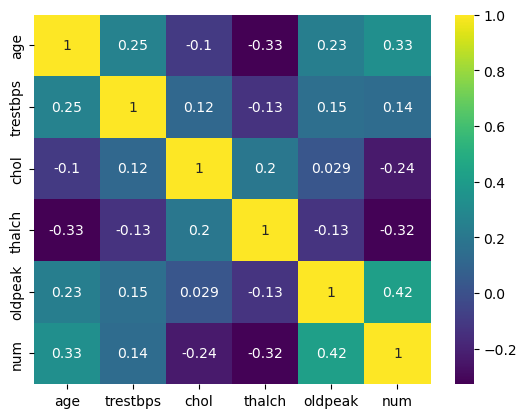

In [16]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True,cmap='viridis')

In [17]:
# Relations between variables in this dataset is low positive relations and low negative relations. Meaning there are no strong correlations in the dataset.

In [18]:
# Lets start with feature engineering.

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,normal,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,fixed defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,fixed defect,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,reversable defect,4


In [20]:
# Lets check all the categorical variables

In [21]:
df['sex'].value_counts()

sex
Male      717
Female    190
Name: count, dtype: int64

In [22]:
df['cp'].value_counts()

cp
asymptomatic       495
non-anginal        202
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [23]:
df['fbs'].value_counts()

fbs
False    722
True     185
Name: count, dtype: int64

In [24]:
df['restecg'].value_counts()

restecg
normal              542
lv hypertrophy      187
st-t abnormality    178
Name: count, dtype: int64

In [25]:
df['exang'].value_counts()

exang
False    516
True     336
TURE      36
FALSE     19
Name: count, dtype: int64

In [26]:
df['slope'].value_counts()

slope
flat           453
upsloping      298
downsloping    156
Name: count, dtype: int64

In [27]:
df['thal'].value_counts()

thal
normal               355
reversable defect    351
fixed defect         201
Name: count, dtype: int64

In [28]:
df['num'].value_counts()

num
0    399
1    265
2    108
3    107
4     28
Name: count, dtype: int64

In [29]:
# All categorical variables look normal to me except 'exang' variable. It contains mispelled True and False elements. Lets fix that

In [30]:
df['exang'] = df['exang'].replace({'TURE': 'True', 'FALSE': 'False'})
df['exang'] = df['exang'].astype(str).str.lower().map({'true': True, 'false': False})

In [31]:
df['exang'].value_counts()

exang
False    535
True     372
Name: count, dtype: int64

In [32]:
new_df = df.copy()
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,normal,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,fixed defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,fixed defect,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.891253,downsloping,reversable defect,4


In [33]:
# lets encode these categorical variables.

In [34]:
le = LabelEncoder()
df['cp'] = le.fit_transform(df['cp'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])
df['exang'] = le.fit_transform(df['exang'])
df['sex'] = pd.get_dummies(df['sex'],drop_first = True).astype(int)
df['fbs'] = pd.get_dummies(df['fbs'],drop_first = True).astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,0,125,0,0,1,120,0,1.500000,2,1,4
903,62,1,0,166,170,0,2,120,1,3.000000,1,0,4
904,56,1,2,170,0,0,0,123,1,2.500000,0,0,4
905,56,1,2,144,208,1,2,105,1,0.891253,0,2,4


In [35]:
scaler = StandardScaler()
df['age']=scaler.fit_transform(df[['age']])
df['trestbps'] = scaler.fit_transform(df[['trestbps']])
df['chol'] = scaler.fit_transform(df[['chol']])
df['thalch'] = scaler.fit_transform(df[['thalch']])
df['oldpeak'] = scaler.fit_transform(df[['oldpeak']])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.333854,0,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-0.845392,1,0,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-0.466392,1,0,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-0.845392,1,0,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,0.575856,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.085969,1,0,-0.412488,-1.797250,0,1,-0.596189,0,0.575856,2,1,4
903,0.896890,1,0,1.597890,-0.280698,0,2,-0.596189,1,1.997103,1,0,4
904,0.241651,1,2,1.794024,-1.797250,0,0,-0.484242,1,1.523354,0,0,4
905,0.241651,1,2,0.519151,0.058296,1,2,-1.155926,1,-0.000931,0,2,4


In [36]:
# Now lets seperate independent and dependent variables.

In [37]:
X = df.drop(columns = 'num')
y = df['num']

In [38]:
# Using 80% of data for training and 20% of the data for testing.

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 897)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 12)
(182, 12)
(725,)
(182,)


In [40]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth =5,max_features = 5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=5)

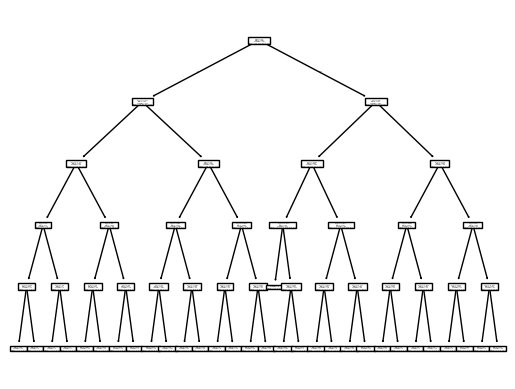

<Figure size 3000x2000 with 0 Axes>

In [41]:
tree.plot_tree(model)
figure = plt.figure(figsize=(30,20))
plt.show()



In [42]:
num_predicted = model.predict(X_test)

In [43]:
num_train_predicted = model.predict(X_train)
accuracy_score(num_train_predicted,y_train)

0.6524137931034483

In [44]:
accuracy_score(num_predicted,y_test)

0.4945054945054945

In [45]:
precision_score(num_predicted,y_test,average='micro')

0.4945054945054945

In [46]:
recall_score(num_predicted,y_test,average='macro')

0.28296687828838796

In [47]:
f1_score(num_predicted,y_test,average='micro')

0.4945054945054945

# Hyperparameter Tuning

In [49]:
# Lets perform hyperparameter tuning to find the best parameters for the Decision Tree. 

In [50]:
param_grid = {
    'criterion': ['entropy','gini','log_loss'],
    'max_depth': [3,4,5,6,7,8],
    'max_features': [3,4,5]
}
grid = GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, max_features=5),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [3, 4, 5]},
             scoring='accuracy')

In [51]:
best_model = grid.best_estimator_
best_model

DecisionTreeClassifier(max_depth=4, max_features=5)

In [52]:
y_pred_test = grid.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.46703296703296704

# Interview Questions:

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance

# 2. What is the difference between the Label encoding and One-hot encoding?